In [23]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/2_6_23/2023_02_06_22_02_43_73L4multistep.npy',allow_pickle=True).tolist()
t = np.array(data['nT'])[:,1] # scan time
detuning = np.array(data['nT'])[:,3] # detuning
rabi = np.array(data['nT'])[:,2] # Rabi
E = np.array(data['E']) # energy for the lowest three states
overlap = np.array(data['overlap'])# overlap with fm, afm, ground state, 1st excited state, 2nd excited state

Text(0, 0.5, 'Overlap <Ground state|evolve state>')

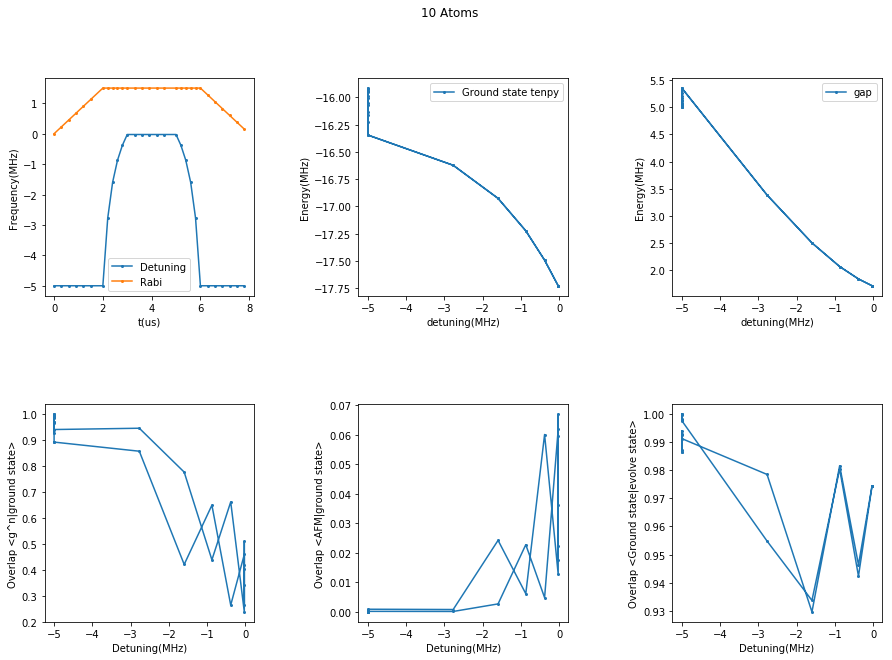

In [24]:
ms = 2
ls = '-'
fig, ax = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('10 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,0].plot(t,detuning,marker='o',markersize = ms,ls = ls,label = 'Detuning')
ax[0,0].plot(t,rabi,marker='o',markersize = ms,ls = ls,label = 'Rabi')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
ax[0,0].legend()

ax[0,1].plot(detuning,(E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'Ground state tenpy')
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].legend()

ax[0,2].plot(detuning,(E[:,2]-E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'gap')
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')

ax[0,2].legend()

ax[1,0].plot(detuning,overlap[:,0],marker='o',markersize = ms,ls = ls)
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|ground state>')

ax[1,1].plot(detuning,overlap[:,1],marker='o',markersize = ms,ls = ls)
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|ground state>')

ax[1,2].plot(detuning,overlap[:,2],marker='o',markersize = ms,ls = ls)
ax[1,2].set_xlabel('Detuning(MHz)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')

In [18]:
def UniLILA(t,t_len, dinit,gapinit,gapcrit,dcrit):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit*(t_len -t)
    denomsteps1 = gapinit* t + gapcrit * (t_len - t)
    if t>t_len:
        out = dcrit
    else:
        out = numstep1/denomsteps1
    return out
def Deltafunc(time):
    if 0<=time<Rabi_ramp_time:
        return dinit
    if Rabi_ramp_time<= time <Rabi_ramp_time+T_UniLILA_stop:
        return UniLILA(time-Rabi_ramp_time,T_UniLILA,dinit,gapinit, gapcrit,dcrit)
    if Rabi_ramp_time+T_UniLILA_stop <= time < T_UniLILA_stop + Rabi_ramp_time+ twait:
        return UniLILA(T_UniLILA_stop,T_UniLILA,dinit,gapinit, gapcrit,dcrit)
    if  T_UniLILA_stop + Rabi_ramp_time+ twait <= time <  2*T_UniLILA_stop + Rabi_ramp_time+ twait:
        temp_t = T_total-time
        return UniLILA(temp_t-Rabi_ramp_time,T_UniLILA,dinit,gapinit, gapcrit,dcrit)
    if 2*T_UniLILA_stop + Rabi_ramp_time+ twait<= time <= T_total:
        return dinit
    else:
        print('detuning t out of range ', str(t))
        return

In [19]:
Rabi_ramp_time = 2
T_UniLILA = 5
T_UniLILA_stop = 1
gapinit= 5.26
gapcrit = 0.767
twait = 2
dinit = -5.0
dcrit = 1.3
Omega = 2
auto_tinflect = 0
T_total = Rabi_ramp_time*2+T_UniLILA_stop*2 + t_wait
t = np.arange(0,T_total,0.01)
print(T_total)

8


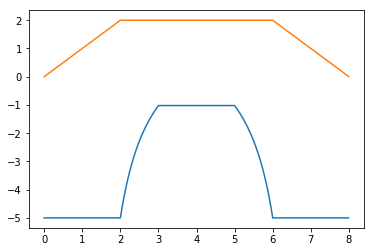

In [20]:
detuning = []
rabi = []
for t_i in t:
    detuning.append(Deltafunc(t_i))
    rabi.append(Omegafunc(t_i))
plt.plot(t,detuning)
plt.plot(t,rabi)

In [9]:
def Omegafunc(time):
    if 0 <= time < Rabi_ramp_time:
        return Omega*time/Rabi_ramp_time
    if Rabi_ramp_time<= time < T_total -Rabi_ramp_time:
        return Omega
    if T_total -Rabi_ramp_time <= time<= T_total:
        return Omega*(T_total-time)/Rabi_ramp_time
    else:
        print('Omega t out of range',str(t))
        return

In [22]:
print('rabi down',str(Omega*(T_total-1)/Rabi_ramp_time))

rabi down 7.0


In [25]:
import os

In [26]:
os. getcwd()

'C:\\Users\\wangy\\Rydberg simulation\\tenpy_results'